In [1]:
! pip install deepchecks --upgrade -q
! pip install dask distributed --upgrade -q
from deepchecks.tabular.suites import full_suite
from deepchecks.tabular import Dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)

In [4]:
seasonal_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agritask Data Scientist Home Test/seasonal_dataset.csv', sep='\t')
seasonal_phen_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agritask Data Scientist Home Test/seasonal_phen_dataset.csv', sep='\t')

In [5]:
seasonal_df.head()

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_savi2,min_savi2,max_savi2,skew_savi2,kurt_savi2,std_savi2,mean_ndwi,min_ndwi,max_ndwi,skew_ndwi,kurt_ndwi,std_ndwi,mean_savi,min_savi,max_savi,skew_savi,kurt_savi,std_savi,mean_mndvi,min_mndvi,max_mndvi,skew_mndvi,kurt_mndvi,std_mndvi,mean_ndmi,min_ndmi,max_ndmi,skew_ndmi,kurt_ndmi,std_ndmi,mean_evi,min_evi,max_evi,skew_evi,kurt_evi,std_evi,mean_arvi,min_arvi,max_arvi,skew_arvi,kurt_arvi,std_arvi,mean_ndvi,min_ndvi,max_ndvi,skew_ndvi,kurt_ndvi,std_ndvi,mean_msavi,min_msavi,max_msavi,skew_msavi,kurt_msavi,std_msavi,mean_cri,min_cri,max_cri,skew_cri,kurt_cri,std_cri,mean_cari,min_cari,max_cari,skew_cari,kurt_cari,std_cari,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp
0,AL549648Z,CR196HWQ141Z,3720.0,0.034516,0.022804,0.044988,-0.494315,NaN,0.011144,-0.703579,-0.817066,-0.536838,1.412881,NaN,0.147510,0.240046,-0.494315,0.809575,0.042332,-0.477363,0.376083,1.121969,1.051180,1.221244,1.297945,NaN,0.088538,0.262918,0.120206,0.355849,-1.504415,NaN,0.125461,0.779285,0.477011,1.004268,-1.175489,NaN,0.271993,0.712977,0.544909,0.818598,-1.565798,NaN,0.147143,0.952844,0.088538,1.297945,-1.730873,3.252084,0.348872,0.637284,0.375433,0.809575,-1.484466,NaN,0.230512,4.520818,3.662016,5.898924,1.578787,NaN,1.205486,0.329256,0.294461,0.348998,-1.685287,NaN,0.030225,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.936170,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.936170,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,4.575,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875,27.5,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.800,27.0,34.0,-0.581393,-0.728228
1,AL549649Z,CR196NSMKZ,3600.0,0.037360,0.029283,0.042867,-1.408678,NaN,0.007148,-0.735926,-0.799896,-0.628707,1.636704,NaN,0.093431,0.200805,-1.408678,0.803138,-1.742472,4.648706,0.565261,1.088668,1.084409,1.096759,1.724813,NaN,0.007010,0.309345,0.194709,0.378183,-1.629082,NaN,0.099944,0.862194,0.668208,0.977748,-1.638534,NaN,0.169019,0.760314,0.666682,0.812342,-1.700019,NaN,0.081254,0.977445,0.007010,1.724813,-0.915355,3.871753,0.407054,0.700318,0.544379,0.803138,-1.480268,NaN,0.137314,4.727697,3.133038,6.226470,-0.277505,NaN,1.548944,0.352015,0.326497,0.390450,1.466427,NaN,0.033877,LVAd,132.430769,93.646154,79.461538,115.646154,214.353846,259.123077,610.861538,208.138462,40.138462,610.861538,573.169231,616.630769,518.969231,175.323077,167.630769,174.830769,58.076923,188.215385,127.953846,203.553846,4.575,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875,27.5,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.800,27.0,34.0,-0.581393,-0.728228
2,AL549319Z,CR196NSLNZ,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LVAd,132.037037,107.148148,93.851852,134.111111,211.814815,259.259259,609.074074,207.925926,40.592593,609.074074,569.962963,612.962963,522.444444,179.222222,170.777778,178.962963,57.518519,190.037037,134.148148,207.814815,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL549320Z,CR196NSLPZ,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
seasonal_phen_df['Season code'].value_counts().sort_values()

CR196HWQ141Z    1
CR196JAQ022Z    1
CR196NSLNZ      1
CR196NSLPZ      1
CR196HWQ142Z    1
               ..
CR196PGQ057Z    1
CR196Q007G1Z    1
CR196Q007G2Z    1
CR196PUMCZ      1
CR196IL5IG0Z    1
Name: Season code, Length: 3220, dtype: int64

In [7]:
seasonal_df.shape, seasonal_df.drop_duplicates().shape

((3236, 111), (3224, 111))

In [8]:
seasonal_phen_df.shape,seasonal_phen_df.drop_duplicates().shape, seasonal_phen_df.drop_duplicates(subset= ['plot code','Season code']).shape

((3224, 340), (3224, 340), (3221, 340))

In [9]:
seasonal_df[seasonal_df.duplicated(subset =['plot code','Season code'], keep=False)].dropna(axis=1,how='all')

,Sitlav - Soybeans - Yield - KG/Ha,sum_rain
1176,5095.6,0.0
1177,5095.6,0.0
1178,5095.6,0.0
1179,5095.6,0.0
1831,3240.0,0.0
1832,3240.0,0.0
1833,3240.0,0.0
1834,3240.0,0.0
2007,3011.0,0.0
2008,3011.0,0.0


In [10]:
seasonal_phen_df[seasonal_phen_df.duplicated(subset =['plot code','Season code'], keep=False)].dropna(axis=1,how='all')

,Sitlav - Soybeans - Yield - KG/Ha,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4
1176,5095.6,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1828,3240.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,3011.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2646,4099.7,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
seasonal_phen_df.head()

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_phen_savi2_1,max_phen_savi2_1,std_phen_savi2_1,skew_phen_savi2_1,kurt_phen_savi2_1,mean_phen_savi2_2,max_phen_savi2_2,std_phen_savi2_2,skew_phen_savi2_2,kurt_phen_savi2_2,mean_phen_savi2_3,max_phen_savi2_3,std_phen_savi2_3,skew_phen_savi2_3,kurt_phen_savi2_3,mean_phen_savi2_4,max_phen_savi2_4,std_phen_savi2_4,skew_phen_savi2_4,kurt_phen_savi2_4,mean_phen_ndwi_1,max_phen_ndwi_1,std_phen_ndwi_1,skew_phen_ndwi_1,kurt_phen_ndwi_1,mean_phen_ndwi_2,max_phen_ndwi_2,std_phen_ndwi_2,skew_phen_ndwi_2,kurt_phen_ndwi_2,mean_phen_ndwi_3,max_phen_ndwi_3,std_phen_ndwi_3,skew_phen_ndwi_3,kurt_phen_ndwi_3,mean_phen_ndwi_4,max_phen_ndwi_4,std_phen_ndwi_4,skew_phen_ndwi_4,kurt_phen_ndwi_4,mean_phen_savi_1,max_phen_savi_1,std_phen_savi_1,skew_phen_savi_1,kurt_phen_savi_1,mean_phen_savi_2,max_phen_savi_2,std_phen_savi_2,skew_phen_savi_2,kurt_phen_savi_2,mean_phen_savi_3,max_phen_savi_3,std_phen_savi_3,skew_phen_savi_3,kurt_phen_savi_3,mean_phen_savi_4,max_phen_savi_4,std_phen_savi_4,skew_phen_savi_4,kurt_phen_savi_4,mean_phen_mndvi_1,max_phen_mndvi_1,std_phen_mndvi_1,skew_phen_mndvi_1,kurt_phen_mndvi_1,mean_phen_mndvi_2,max_phen_mndvi_2,std_phen_mndvi_2,skew_phen_mndvi_2,kurt_phen_mndvi_2,mean_phen_mndvi_3,max_phen_mndvi_3,std_phen_mndvi_3,skew_phen_mndvi_3,kurt_phen_mndvi_3,mean_phen_mndvi_4,max_phen_mndvi_4,std_phen_mndvi_4,skew_phen_mndvi_4,kurt_phen_mndvi_4,mean_phen_ndmi_1,max_phen_ndmi_1,std_phen_ndmi_1,skew_phen_ndmi_1,kurt_phen_ndmi_1,mean_phen_ndmi_2,max_phen_ndmi_2,std_phen_ndmi_2,skew_phen_ndmi_2,kurt_phen_ndmi_2,mean_phen_ndmi_3,max_phen_ndmi_3,std_phen_ndmi_3,skew_phen_ndmi_3,kurt_phen_ndmi_3,mean_phen_ndmi_4,max_phen_ndmi_4,std_phen_ndmi_4,skew_phen_ndmi_4,kurt_phen_ndmi_4,mean_phen_evi_1,max_phen_evi_1,std_phen_evi_1,skew_phen_evi_1,kurt_phen_evi_1,mean_phen_evi_2,max_phen_evi_2,std_phen_evi_2,skew_phen_evi_2,kurt_phen_evi_2,mean_phen_evi_3,max_phen_evi_3,std_phen_evi_3,skew_phen_evi_3,kurt_phen_evi_3,mean_phen_evi_4,max_phen_evi_4,std_phen_evi_4,skew_phen_evi_4,kurt_phen_evi_4,mean_phen_arvi_1,max_phen_arvi_1,std_phen_arvi_1,skew_phen_arvi_1,kurt_phen_arvi_1,mean_phen_arvi_2,max_phen_arvi_2,std_phen_arvi_2,skew_phen_arvi_2,kurt_phen_arvi_2,mean_phen_arvi_3,max_phen_arvi_3,std_phen_arvi_3,skew_phen_arvi_3,kurt_phen_arvi_3,mean_phen_arvi_4,max_phen_arvi_4,std_phen_arvi_4,skew_phen_arvi_4,kurt_phen_arvi_4,mean_phen_ndvi_1,max_phen_ndvi_1,std_phen_ndvi_1,skew_phen_ndvi_1,kurt_phen_ndvi_1,mean_phen_ndvi_2,max_phen_ndvi_2,std_phen_ndvi_2,skew_phen_ndvi_2,kurt_phen_ndvi_2,mean_phen_ndvi_3,max_phen_ndvi_3,std_phen_ndvi_3,skew_phen_ndvi_3,kurt_phen_ndvi_3,mean_phen_ndvi_4,max_phen_ndvi_4,std_phen_ndvi_4,skew_phen_ndvi_4,kurt_phen_ndvi_4,mean_phen_msavi_1,max_phen_msavi_1,std_phen_msavi_1,skew_phen_msavi_1,kurt_phen_msavi_1,mean_phen_msavi_2,max_phen_msavi_2,std_phen_msavi_2,skew_phen_msavi_2,kurt_phen_msavi_2,mean_phen_msavi_3,max_phen_msavi_3,std_phen_msavi_3,skew_phen_msavi_3,kurt_phen_msavi_3,mean_phen_msavi_4,max_phen_msavi_4,std_phen_msavi_4,skew_phen_msavi_4,kurt_phen_msavi_4,mean_phen_cri_1,max_phen_cri_1,std_phen_cri_1,skew_phen_cri_1,kurt_phen_cri_1,mean_phen_cri_2,max_phen_cri_2,std_phen_cri_2,skew_phen_cri_2,kurt_phen_cri_2,mean_phen_cri_3,max_phen_cri_3,std_phen_cri_3,skew_phen_cri_3,kurt_phen_cri_3,mean_phen_cri_4,max_phen_cri_4,std_phen_cri_4,skew_phen_cri_4,kurt_phen_cri_4,mean_phen_cari_1,max_phen_cari_1,std_phen_cari_1,skew_phen_cari_1,kurt_phen_cari_1,mean_phen_cari_2,max_phen_cari_2,std_phen_cari_2,skew_phen_cari_2,kurt_phen_cari_2,mean_phen_cari_3,max_phen_cari_3,std_phen_cari_3,skew_phen_cari_3,kurt_phen_cari_3,mean_phen_cari_4,max_phen_cari_4,std_phen_cari_4,skew_phen_cari_4,kurt_phen_cari_4,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4,daily rainmean_1,da

In [12]:
seasonal_df = seasonal_df.drop_duplicates(subset =['plot code','Season code'], keep=False)
seasonal_phen_df = seasonal_phen_df.drop_duplicates(subset =['plot code','Season code'], keep=False)

In [13]:
seasonal_df.shape,seasonal_phen_df.shape 

((3220, 111), (3220, 340))

In [14]:
seasonal_df.loc[(seasonal_df['plot code']=='AL549648Z')]

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,mean_savi2,min_savi2,max_savi2,skew_savi2,kurt_savi2,std_savi2,mean_ndwi,min_ndwi,max_ndwi,skew_ndwi,kurt_ndwi,std_ndwi,mean_savi,min_savi,max_savi,skew_savi,kurt_savi,std_savi,mean_mndvi,min_mndvi,max_mndvi,skew_mndvi,kurt_mndvi,std_mndvi,mean_ndmi,min_ndmi,max_ndmi,skew_ndmi,kurt_ndmi,std_ndmi,mean_evi,min_evi,max_evi,skew_evi,kurt_evi,std_evi,mean_arvi,min_arvi,max_arvi,skew_arvi,kurt_arvi,std_arvi,mean_ndvi,min_ndvi,max_ndvi,skew_ndvi,kurt_ndvi,std_ndvi,mean_msavi,min_msavi,max_msavi,skew_msavi,kurt_msavi,std_msavi,mean_cri,min_cri,max_cri,skew_cri,kurt_cri,std_cri,mean_cari,min_cari,max_cari,skew_cari,kurt_cari,std_cari,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp
0,AL549648Z,CR196HWQ141Z,3720.0,0.034516,0.022804,0.044988,-0.494315,NaN,0.011144,-0.703579,-0.817066,-0.536838,1.412881,NaN,0.147510,0.240046,-0.494315,0.809575,0.042332,-0.477363,0.376083,1.121969,1.051180,1.221244,1.297945,NaN,0.088538,0.262918,0.120206,0.355849,-1.504415,NaN,0.125461,0.779285,0.477011,1.004268,-1.175489,NaN,0.271993,0.712977,0.544909,0.818598,-1.565798,NaN,0.147143,0.952844,0.088538,1.297945,-1.730873,3.252084,0.348872,0.637284,0.375433,0.809575,-1.484466,NaN,0.230512,4.520818,3.662016,5.898924,1.578787,NaN,1.205486,0.329256,0.294461,0.348998,-1.685287,NaN,0.030225,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.93617,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,4.57500,0.0,80.0,4.370865,24.614484,366.0,25.455140,23.875000,27.500000,0.166153,-0.883704,22.6500,21.0,23.0,-0.939848,-0.433482,30.8000,27.0,34.0,-0.581393,-0.728228
1051,AL549648Z,CR196NSQ0HKZ,3390.5,0.017349,0.006412,0.025671,-1.106251,NaN,0.009892,-0.469392,-0.633131,-0.286196,0.496099,NaN,0.174284,0.016176,-1.106251,0.436442,-2.612986,9.161625,0.352623,0.486344,0.276593,0.764598,1.136230,NaN,0.251111,-0.078829,-0.282838,0.063572,-1.352914,NaN,0.181236,0.223805,0.098993,0.464084,1.728122,NaN,0.208140,0.337546,0.112912,0.572085,0.193641,NaN,0.229747,0.498221,0.134346,1.136230,0.986499,0.624551,0.296674,0.205878,0.088434,0.436442,1.731137,NaN,0.199686,30.774844,1.046945,81.908395,1.664081,NaN,44.478028,0.352124,0.139135,0.526590,-0.847998,NaN,0.196579,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.93617,180.106383,175.170213,180.042553,58.234043,184.446809,123.297872,226.319149,5.07500,0.0,115.0,5.081694,30.575214,406.0,26.387274,22.875000,28.833333,-0.421580,-0.361988,22.8125,21.0,24.0,-0.256167,0.181263,31.4375,25.0,36.0,-0.623114,0.127067
2147,AL549648Z,CR196PALXZ,1297.0,0.033646,0.022360,0.043992,-0.299722,-1.73571,0.008823,-0.652929,-0.807819,-0.316392,1.345878,0.906697,0.210803,0.177080,-1.735710,0.798778,-2.022600,6.853856,0.549845,0.864115,0.306520,1.050888,-2.086169,4.405172,0.316237,0.152880,-0.272695,0.335084,-1.488882,1.629899,0.260259,0.681963,0.133400,0.994365,-1.258730,0.957419,0.345739,0.630808,0.135565,0.822953,-1.740167,2.807116,0.292434,0.786595,-2.086169,4.405172,0.945731,6.691288,1.231246,0.577064,0.117731,0.798778,-1.287328,0.639461,0.290638,5.685006,1.420185,12.219902,1.330045,2.873622,3.968052,0.393814,0.250461,0.582433,0.627169,0.313243,0.127338,LVAd,131.723404,92.340426,80.595745,113.659574,228.297872,270.93617,591.765957,222.531915,38.659574,591.765957,553.851064,597.425532,503.

In [15]:
seasonal_df.groupby(['plot code','Season code']).size().nlargest()

plot code  Season code 
AL544540Z  CR196IKKIJ5Z    1
           CR196LWQ0DXZ    1
           CR196PUJKZ      1
AL544541Z  CR196J6Q05CZ    1
           CR196P7HHZ      1
dtype: int64

In [16]:
seasonal_phen_df.groupby(['plot code','Season code']).size().nlargest(10)

plot code  Season code 
AL544540Z  CR196IKKIJ5Z    1
           CR196LWQ0DXZ    1
           CR196PUJKZ      1
AL544541Z  CR196J6Q05CZ    1
           CR196P7HHZ      1
           CR196PBQ039Z    1
AL544542Z  CR196NRQ0MFZ    1
           CR196P7HJZ      1
           CR196PVQ057Z    1
AL544543Z  CR196J6Q05EZ    1
dtype: int64

<Axes: >

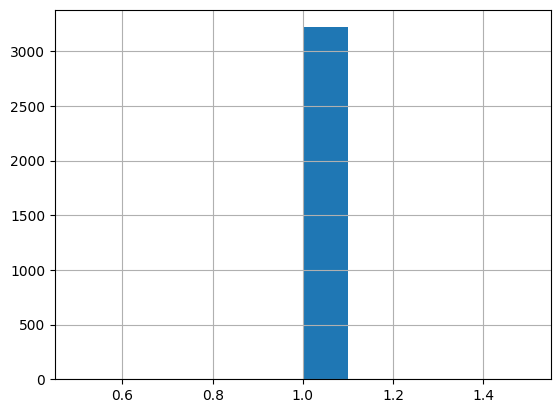

In [17]:
seasonal_phen_df.groupby(['Season code']).size().hist()

<Axes: >

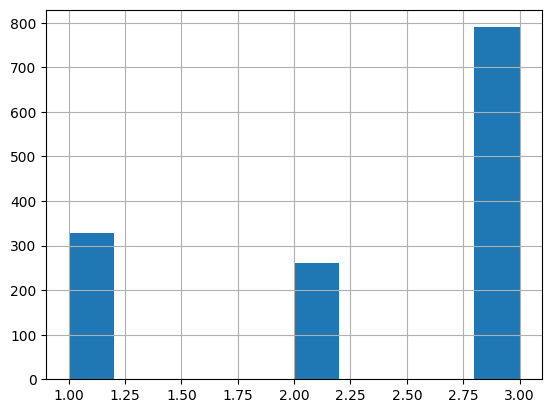

In [18]:
seasonal_phen_df.groupby(['plot code']).size().hist()

We would like to work with minimum 70-80% of non-missing values. As we have 3220 rows we can set a trashold of 750 missing values tops 

In [19]:
def filter_nan_cols(df, trashold=750):
  "filter a data frame by a selected trashold/pct"
  nan_count = df.isna().sum(axis=0)
  filtered_columns = nan_count[nan_count < trashold].index
  return df[filtered_columns]

In [20]:
seasonal_filtred = filter_nan_cols(seasonal_df, trashold=750)

In [21]:
phen_filtred = filter_nan_cols(seasonal_phen_df, trashold=750)

In [22]:
co_excisting_columns = seasonal_filtred.columns[seasonal_filtred.columns.isin(phen_filtred.columns)]
co_excisting_columns

Index(['plot code', 'Season code', 'Sitlav - Soybeans - Yield - KG/Ha',
       'CLASSE_DOM', 'mean_cec_0_5', 'mean_cec_15_30', 'mean_cec_30_60',
       'mean_cec_5_15', 'mean_clay_0_5', 'mean_clay_15_30', 'mean_clay_30_60',
       'mean_clay_5_15', 'mean_ph_0_5', 'mean_sand_0_5', 'mean_sand_15_30',
       'mean_sand_5_15', 'mean_silt_0_5', 'mean_silt_15_30', 'mean_silt_30_60',
       'mean_silt_5_15', 'mean_soc_0_5', 'mean_soc_15_30', 'mean_soc_30_60',
       'mean_soc_5_15'],
      dtype='object')

In [23]:
join_df = seasonal_filtred.merge(phen_filtred, on=list(co_excisting_columns)).round(2)

In [24]:
corr_matrix = join_df.corr()
mask = np.tril(np.ones_like(join_df.corr()))

We can see that most of the corrolated columns are ralted to the same varible 

<Axes: >

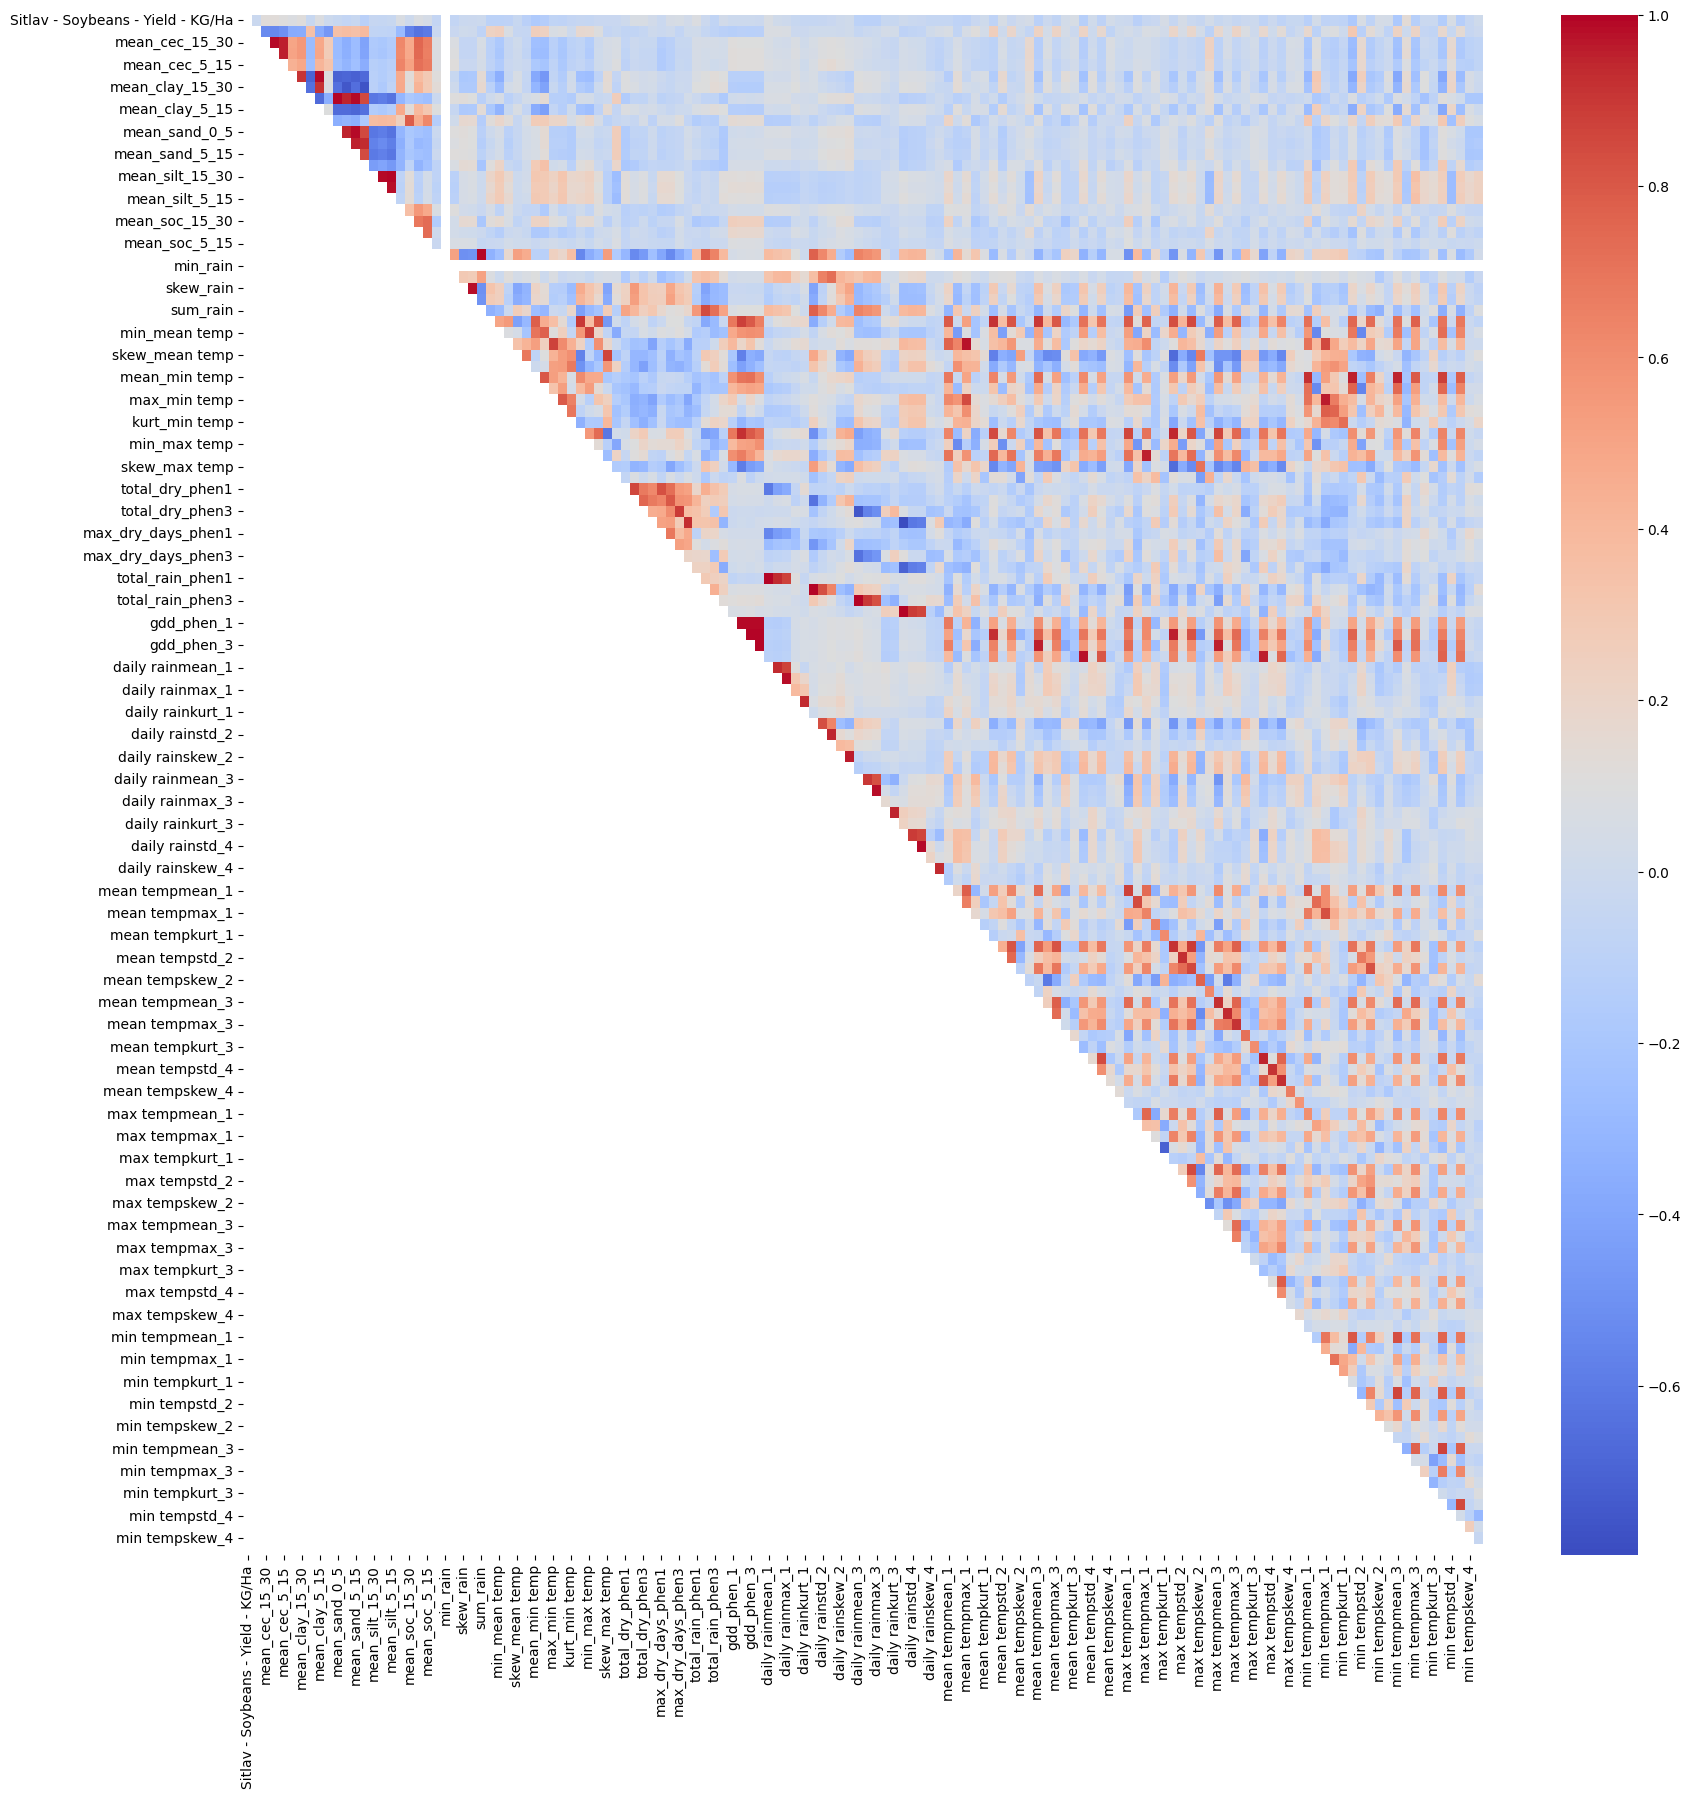

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask)

<Axes: >

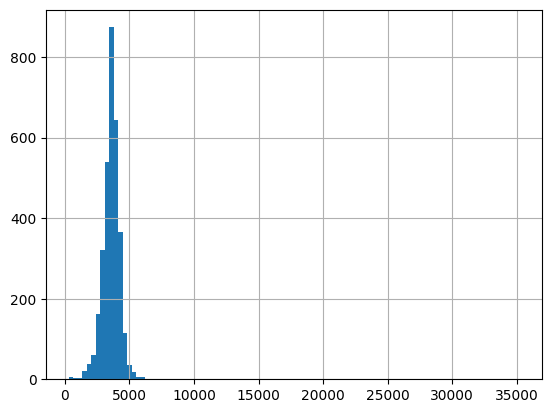

In [26]:
join_df['Sitlav - Soybeans - Yield - KG/Ha'].round(0).hist(bins=100)

In [27]:
join_df['Sitlav - Soybeans - Yield - KG/Ha'].nlargest(10)

987     35220.0
1450    10960.3
2365     6116.5
2433     5967.9
2875     5929.5
2439     5888.2
2461     5887.9
691      5868.0
2871     5726.1
2366     5657.0
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

In [28]:
join_df['Sitlav - Soybeans - Yield - KG/Ha'].nsmallest(10)

3213     285.9
2942     451.9
2207     506.4
2671     581.9
779      618.0
1244     882.4
2139     892.0
2464     970.2
2343    1038.4
2664    1083.1
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

In [29]:
join_df = join_df.loc[(join_df['Sitlav - Soybeans - Yield - KG/Ha']>600) & (join_df['Sitlav - Soybeans - Yield - KG/Ha']< 10000)]

<Axes: xlabel='Sitlav - Soybeans - Yield - KG/Ha', ylabel='Count'>

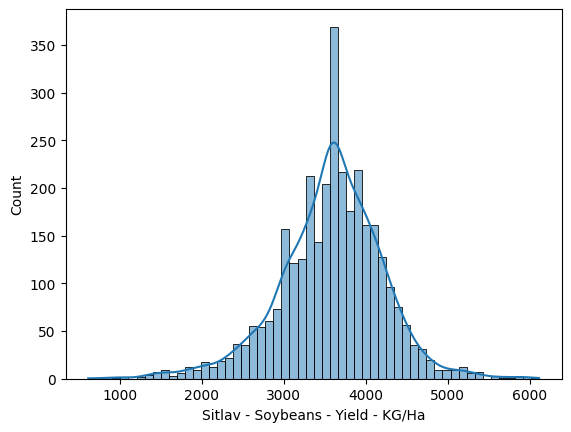

In [30]:
sns.histplot(join_df['Sitlav - Soybeans - Yield - KG/Ha'], kde=True)


In [31]:
join_df.CLASSE_DOM.value_counts()

LVAd    1319
LVd      749
RQo      675
FFc      183
PVAd     152
RLd      107
LAd       23
PVe        6
Name: CLASSE_DOM, dtype: int64

In [32]:
join_df['Sitlav - Soybeans - Yield - KG/Ha'].agg(['min','max','mean','std'])

min      618.000000
max     6116.500000
mean    3578.268139
std      638.558650
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: float64

We would like to see if there is something special about extreamly low yeaild that jumps out

In [33]:
join_df[join_df['Sitlav - Soybeans - Yield - KG/Ha']<1000]

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4,daily rainmean_1,daily rainstd_1,daily rainmax_1,daily rainskew_1,daily rainkurt_1,daily rainmean_2,daily rainstd_2,daily rainmax_2,daily rainskew_2,daily rainkurt_2,daily rainmean_3,daily rainstd_3,daily rainmax_3,daily rainskew_3,daily rainkurt_3,daily rainmean_4,daily rainstd_4,daily rainmax_4,daily rainskew_4,daily rainkurt_4,mean tempmean_1,mean tempstd_1,mean tempmax_1,mean tempskew_1,mean tempkurt_1,mean tempmean_2,mean tempstd_2,mean tempmax_2,mean tempskew_2,mean tempkurt_2,mean tempmean_3,mean tempstd_3,mean tempmax_3,mean tempskew_3,mean tempkurt_3,mean tempmean_4,mean tempstd_4,mean tempmax_4,mean tempskew_4,mean tempkurt_4,max tempmean_1,max tempstd_1,max tempmax_1,max tempskew_1,max tempkurt_1,max tempmean_2,max tempstd_2,max tempmax_2,max tempskew_2,max tempkurt_2,max tempmean_3,max tempstd_3,max tempmax_3,max tempskew_3,max tempkurt_3,max tempmean_4,max tempstd_4,max tempmax_4,max tempskew_4,max tempkurt_4,min tempmean_1,min tempstd_1,min tempmax_1,min tempskew_1,min tempkurt_1,min tempmean_2,min tempstd_2,min tempmax_2,min tempskew_2,min tempkurt_2,min tempmean_3,min tempstd_3,min tempmax_3,min tempskew_3,min tempkurt_3,min tempmean_4,min tempstd_4,min tempmax_4,min tempskew_4,min tempkurt_4
779,AL548265Z,CR196LWQ013Z,618.0,LVd,129.32,90.89,81.16,112.47,243.05,280.00,520.84,258.84,47.63,520.84,494.84,512.74,478.58,228.47,225.11,236.05,56.05,195.21,119.84,256.68,3.75,0.0,37.71,2.87,8.21,300.23,25.09,23.42,26.65,-0.06,-0.93,21.95,21.0,23.0,-0.16,1.58,30.40,26.0,34.0,-0.34,-0.61,9.0,15.0,10.0,6.0,3,9,8,5,113.66,154.83,21.74,10.00,334.0,566.5,234.5,159.0,5.68,10.44,37.71,2.13,4.07,4.42,7.97,31.37,2.54,6.12,1.45,2.63,8.05,1.69,1.79,1.0,1.95,5.86,2.20,4.48,25.69,0.91,26.65,-0.91,-0.33,24.99,0.89,26.58,-0.10,-0.85,24.61,0.77,25.71,-0.08,-1.35,24.91,0.54,25.96,0.37,1.07,31.55,1.57,34.0,-0.33,-1.10,30.43,1.72,33.0,-0.64,-0.95,29.27,1.67,31.0,-0.59,-0.71,29.7,1.25,31.0,-0.14,-1.77,21.85,0.49,23.0,-0.44,1.30,21.94,0.54,23.0,-0.06,0.76,22.00,0.38,23.0,0.00,7.00,22.1,0.32,23.0,3.16,10.00
1244,AL548725Z,CR196NRQ0CPZ,882.4,RQo,131.45,94.10,87.55,113.21,277.86,297.34,576.79,292.97,31.00,576.79,562.41,568.55,536.66,138.34,140.24,145.41,62.93,169.76,119.83,195.48,6.10,0.0,45.00,1.89,2.11,488.00,24.71,20.96,27.62,0.16,-0.18,21.34,19.0,23.0,0.06,1.09,28.78,22.0,33.0,-0.38,0.54,18.0,26.0,8.0,6.0,9,11,4,3,32.00,204.00,173.00,79.00,322.5,518.5,215.5,148.0,1.60,5.73,25.00,4.02,16.68,5.83,12.51,38.00,2.01,2.50,11.53,15.62,45.00,1.02,-0.37,7.9,14.33,38.00,1.72,1.51,26.03,1.30,27.62,-0.79,-0.28,24.46,1.24,27.04,-0.18,1.19,23.79,1.09,26.12,0.31,0.31,24.33,0.63,25.04,-0.73,-0.98,30.70,1.78,33.0,-1.17,0.96,28.37,1.91,32.0,-0.76,2.46,27.33,2.02,31.0,-0.35,0.21,28.5,0.85,29.0,-1.36,0.11,21.55,0.94,23.0,-0.99,1.71,21.26,0.70,23.0,0.68,0.87,21.40,0.51,22.0,0.46,-2.09,21.1,0.32,22.0,3.16,10.00
2139,AL549324Z,CR196PAM3Z,892.0,LVAd,129.24,106.65,94.35,137.00,219.06,256.53,587.71,213.00,39.47,587.71,553.00,594.06,499.47,192.71,190.47,193.35,58.06,180.06,120.82,227.47,9.56,0.0,100.00,2.51,7.90,764.50,25.27,23.08,29.78,0.88,1.63,22.75,21.0,26.0,1.19,8.46,29.10,25.0,33.0,0.07,-0.83,16.0,2

In [34]:
join_df.head()

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4,daily rainmean_1,daily rainstd_1,daily rainmax_1,daily rainskew_1,daily rainkurt_1,daily rainmean_2,daily rainstd_2,daily rainmax_2,daily rainskew_2,daily rainkurt_2,daily rainmean_3,daily rainstd_3,daily rainmax_3,daily rainskew_3,daily rainkurt_3,daily rainmean_4,daily rainstd_4,daily rainmax_4,daily rainskew_4,daily rainkurt_4,mean tempmean_1,mean tempstd_1,mean tempmax_1,mean tempskew_1,mean tempkurt_1,mean tempmean_2,mean tempstd_2,mean tempmax_2,mean tempskew_2,mean tempkurt_2,mean tempmean_3,mean tempstd_3,mean tempmax_3,mean tempskew_3,mean tempkurt_3,mean tempmean_4,mean tempstd_4,mean tempmax_4,mean tempskew_4,mean tempkurt_4,max tempmean_1,max tempstd_1,max tempmax_1,max tempskew_1,max tempkurt_1,max tempmean_2,max tempstd_2,max tempmax_2,max tempskew_2,max tempkurt_2,max tempmean_3,max tempstd_3,max tempmax_3,max tempskew_3,max tempkurt_3,max tempmean_4,max tempstd_4,max tempmax_4,max tempskew_4,max tempkurt_4,min tempmean_1,min tempstd_1,min tempmax_1,min tempskew_1,min tempkurt_1,min tempmean_2,min tempstd_2,min tempmax_2,min tempskew_2,min tempkurt_2,min tempmean_3,min tempstd_3,min tempmax_3,min tempskew_3,min tempkurt_3,min tempmean_4,min tempstd_4,min tempmax_4,min tempskew_4,min tempkurt_4
0,AL549648Z,CR196HWQ141Z,3720.0,LVAd,131.72,92.34,80.60,113.66,228.30,270.94,591.77,222.53,38.66,591.77,553.85,597.43,503.94,180.11,175.17,180.04,58.23,184.45,123.30,226.32,4.58,0.0,80.0,4.37,24.61,366.0,25.46,23.88,27.5,0.17,-0.88,22.65,21.0,23.0,-0.94,-0.43,30.80,27.0,34.0,-0.58,-0.73,14.0,22.0,10.0,7.0,8,11,4,4,71.5,164.0,114.5,16.0,348.0,581.5,252.5,156.0,3.58,6.44,20.0,1.71,1.7,4.69,9.44,35.0,2.22,4.12,7.63,20.77,80.0,3.46,12.45,1.6,4.06,13.0,3.01,9.26,26.28,0.88,27.5,-0.71,-0.30,25.21,0.79,26.5,-0.05,-1.23,25.56,0.68,26.96,0.55,-0.04,24.53,0.60,25.75,1.15,0.38,32.2,1.28,34.0,-0.91,0.71,30.66,1.97,33.0,-0.64,-0.80,30.93,1.22,33.0,-0.13,-1.03,28.3,1.57,31.0,1.11,-0.07,22.60,0.6,23.0,-1.25,0.78,22.57,0.5,23.0,-0.30,-2.03,22.73,0.46,23.0,-1.18,-0.73,22.9,0.32,23.0,-3.16,10.0
1,AL549649Z,CR196NSMKZ,3600.0,LVAd,132.43,93.65,79.46,115.65,214.35,259.12,610.86,208.14,40.14,610.86,573.17,616.63,518.97,175.32,167.63,174.83,58.08,188.22,127.95,203.55,4.58,0.0,80.0,4.37,24.61,366.0,25.46,23.88,27.5,0.17,-0.88,22.65,21.0,23.0,-0.94,-0.43,30.80,27.0,34.0,-0.58,-0.73,14.0,22.0,10.0,7.0,8,11,4,4,71.5,164.0,114.5,16.0,348.0,581.5,252.5,156.0,3.58,6.44,20.0,1.71,1.7,4.69,9.44,35.0,2.22,4.12,7.63,20.77,80.0,3.46,12.45,1.6,4.06,13.0,3.01,9.26,26.28,0.88,27.5,-0.71,-0.30,25.21,0.79,26.5,-0.05,-1.23,25.56,0.68,26.96,0.55,-0.04,24.53,0.60,25.75,1.15,0.38,32.2,1.28,34.0,-0.91,0.71,30.66,1.97,33.0,-0.64,-0.80,30.93,1.22,33.0,-0.13,-1.03,28.3,1.57,31.0,1.11,-0.07,22.60,0.6,23.0,-1.25,0.78,22.57,0.5,23.0,-0.30,-2.03,22.73,0.46,23.0,-1.18,-0.73,22.9,0.32,23.0,-3.16,10.0
2,AL549319Z,CR196NSLNZ,3900.0,LVAd,132.04,107.15,93.85,134.11,211.81,259.26,609.07,207.93,40.59,609.07,569.96,612.96,522.44,179.22,170.78,178.96,57.52,190.04,134.15,207.81,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN

In [35]:
join_df = join_df.reset_index(drop=True)
label_col = 'Sitlav - Soybeans - Yield - KG/Ha'

y_bins_cat = pd.qcut(join_df[label_col], q=20, labels=False)
y_bins_cat

0       11
1        9
2       13
3       13
4        9
        ..
3209     4
3210     5
3211     7
3212    19
3213    19
Name: Sitlav - Soybeans - Yield - KG/Ha, Length: 3214, dtype: int64

In [36]:
y_bins_cat.value_counts()

9     229
13    197
2     190
16    162
7     162
4     161
0     161
1     161
19    161
18    161
8     161
6     161
15    161
12    161
5     160
17    159
11    152
3     131
14    124
10     99
Name: Sitlav - Soybeans - Yield - KG/Ha, dtype: int64

In [37]:
join_df[y_bins_cat==10].head(5)

,plot code,Season code,Sitlav - Soybeans - Yield - KG/Ha,CLASSE_DOM,mean_cec_0_5,mean_cec_15_30,mean_cec_30_60,mean_cec_5_15,mean_clay_0_5,mean_clay_15_30,mean_clay_30_60,mean_clay_5_15,mean_ph_0_5,mean_sand_0_5,mean_sand_15_30,mean_sand_5_15,mean_silt_0_5,mean_silt_15_30,mean_silt_30_60,mean_silt_5_15,mean_soc_0_5,mean_soc_15_30,mean_soc_30_60,mean_soc_5_15,mean_rain,min_rain,max_rain,skew_rain,kurt_rain,sum_rain,mean_mean temp,min_mean temp,max_mean temp,skew_mean temp,kurt_mean temp,mean_min temp,min_min temp,max_min temp,skew_min temp,kurt_min temp,mean_max temp,min_max temp,max_max temp,skew_max temp,kurt_max temp,total_dry_phen1,total_dry_phen2,total_dry_phen3,total_dry_phen4,max_dry_days_phen1,max_dry_days_phen2,max_dry_days_phen3,max_dry_days_phen4,total_rain_phen1,total_rain_phen2,total_rain_phen3,total_rain_phen4,gdd_phen_1,gdd_phen_2,gdd_phen_3,gdd_phen_4,daily rainmean_1,daily rainstd_1,daily rainmax_1,daily rainskew_1,daily rainkurt_1,daily rainmean_2,daily rainstd_2,daily rainmax_2,daily rainskew_2,daily rainkurt_2,daily rainmean_3,daily rainstd_3,daily rainmax_3,daily rainskew_3,daily rainkurt_3,daily rainmean_4,daily rainstd_4,daily rainmax_4,daily rainskew_4,daily rainkurt_4,mean tempmean_1,mean tempstd_1,mean tempmax_1,mean tempskew_1,mean tempkurt_1,mean tempmean_2,mean tempstd_2,mean tempmax_2,mean tempskew_2,mean tempkurt_2,mean tempmean_3,mean tempstd_3,mean tempmax_3,mean tempskew_3,mean tempkurt_3,mean tempmean_4,mean tempstd_4,mean tempmax_4,mean tempskew_4,mean tempkurt_4,max tempmean_1,max tempstd_1,max tempmax_1,max tempskew_1,max tempkurt_1,max tempmean_2,max tempstd_2,max tempmax_2,max tempskew_2,max tempkurt_2,max tempmean_3,max tempstd_3,max tempmax_3,max tempskew_3,max tempkurt_3,max tempmean_4,max tempstd_4,max tempmax_4,max tempskew_4,max tempkurt_4,min tempmean_1,min tempstd_1,min tempmax_1,min tempskew_1,min tempkurt_1,min tempmean_2,min tempstd_2,min tempmax_2,min tempskew_2,min tempkurt_2,min tempmean_3,min tempstd_3,min tempmax_3,min tempskew_3,min tempkurt_3,min tempmean_4,min tempstd_4,min tempmax_4,min tempskew_4,min tempkurt_4
146,AL549408Z,CR196NRNSZ,3624.0,LVd,130.50,131.33,119.44,138.00,261.78,282.17,592.11,263.44,43.11,592.11,576.67,591.72,532.83,144.94,141.22,146.17,68.39,182.39,130.72,212.83,6.03,0.0,60.0,2.54,6.12,482.5,24.68,22.75,26.75,0.38,-0.37,21.45,20.0,22.0,-0.65,-0.50,29.28,26.0,32.0,0.12,-1.06,14.0,26.0,7.0,7.0,7,11,5,6,111.0,173.5,142.0,56.0,322.0,527.5,228.5,151.0,5.55,15.08,60.0,3.15,9.81,4.96,12.12,49.0,2.53,5.56,9.47,16.38,57.0,2.11,4.47,5.6,9.13,22.0,1.13,-0.74,25.58,0.96,26.75,-0.69,-0.28,24.27,0.66,25.58,-0.33,0.12,24.54,0.82,25.71,0.20,-1.14,24.49,0.76,25.83,0.49,-0.03,30.75,1.45,32.0,-1.37,1.27,28.69,1.37,31.0,0.10,-0.36,29.13,1.51,32.0,0.61,-0.88,28.6,1.51,31.0,0.62,-0.67,21.45,0.76,22.0,-1.02,-0.37,21.46,0.56,22.0,-0.35,-0.89,21.33,0.62,22.0,-0.31,-0.40,21.6,0.52,22.0,-0.48,-2.28
147,AL549409Z,CR196NRM5Z,3636.0,LVd,133.12,107.68,94.16,115.40,278.80,274.48,567.40,285.12,30.48,567.40,572.24,561.60,550.88,153.32,153.24,153.76,67.40,157.80,98.08,191.84,5.12,0.0,50.0,2.31,5.03,410.0,24.64,22.75,26.75,0.41,-0.28,21.50,20.0,22.0,-0.74,-0.40,29.18,26.0,32.0,0.19,-1.02,13.0,23.0,7.0,9.0,9,11,5,9,91.0,217.0,100.0,2.0,324.0,524.5,231.5,147.0,4.55,9.42,30.0,2.30,4.31,6.20,12.34,50.0,2.17,4.27,6.67,9.90,32.0,1.57,1.85,0.2,0.63,2.0,3.16,10.00,25.64,0.73,26.75,0.01,-1.50,24.19,0.68,25.67,-0.02,0.28,24.72,0.76,25.83,0.22,-1.46,24.10,0.43,24.62,-0.52,-0.99,30.90,1.02,32.0,-0.77,-0.27,28.51,1.31,31.0,0.26,-0.11,29.40,1.45,32.0,0.47,-1.43,27.7,0.82,29.0,0.69,-1.04,21.50,0.69,22.0,-1.08,0.08,21.46,0.56,22.0,-0.35,-0.89,21.47,0.64,22.0,-0.80,-0.13,21.7,0.48,22.0,-1.04,-1.22
156,AL549752Z,CR196H7Q0U4Z,3624.0,LVd,129.19,105.06,97.53,116.47,287.75,330.81,598.42,301.64,35.61,598.42,550.97,586.14,470.64,112.19,118.25,113.75,80.78,179.61,129.08,219.25,3.45,0.0,45.0,3.22,10.66,276.0,24.26,22.42,26.46,0.38,-0.37,21.08,19.0,22.0,-0.83,3.76,28.68,25.0,32.0,0.18,-0.81,14.0,25.0,12.0,10.0

<Axes: >

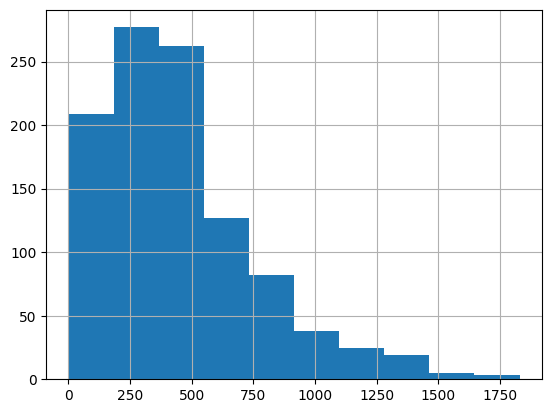

In [38]:
join_df.fillna(0).groupby(['plot code'])['Sitlav - Soybeans - Yield - KG/Ha'].std().hist()

In [ ]:
def drop_corr_cols(df, trashold=0.9):
  # Get the correlation matrix
  corr_matrix = df.corr().abs()

  # Create a mask of the upper triangle of the correlation matrix
  upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)

  # Find the indices of the highly correlated features
  high_corr_features = np.where(corr_matrix > trashold)

  # Create a set of the feature names to drop
  cols_to_drop = set()

  # Add the names of the highly correlated features to the set
  for feature_idx1, feature_idx2 in zip(*high_corr_features):
      if feature_idx1 != feature_idx2 and upper_triangle_mask[feature_idx1, feature_idx2]:
          cols_to_drop.add(df.columns[feature_idx1])

  # Drop the highly correlated features from the DataFrame
  df = df.drop(columns=cols_to_drop)
  return df 

In [39]:
def print_metrics(y_true, y_pred):
  r2 = r2_score(y_test, y_pred)
  print("R-squared: ", r2)
  mae = mean_absolute_error(y_test, y_pred)
  print("MAE: ", mae)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("RMSE: ", rmse)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


import lightgbm as lgbm

for c in join_df.columns:
    col_type = join_df[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        join_df[c] = join_df[c].astype('category')

X_train, X_test, y_train, y_test = train_test_split(join_df.drop(columns=['plot code','Season code',label_col]),join_df[label_col], random_state=0, stratify=y_bins_cat)
# Train Model
lgbm_reg = lgbm.LGBMRegressor(random_state=0, categorical_feature=['CLASSE_DOM'])
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)
print_metrics(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4137395838565634
MAE:  351.7436126614001
RMSE:  479.6075979305963


In [55]:
lgbm_reg = lgbm.LGBMRegressor(random_state=0, categorical_feature=['CLASSE_DOM'],max_depth=4,min_split_gain=0.8,learning_rate=0.1,num_leaves=30)
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)

print_metrics(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.3915764923277846
MAE:  357.72859039849845
RMSE:  488.58908577461386


In [42]:
from sklearn.model_selection import KFold 

r2 = []
mae = []
rmse = []
X = join_df.drop(columns=['plot code','Season code',label_col])
y = join_df[label_col]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y_bins_cat)):
    train_data, y_train= X.iloc[train_idx], y[train_idx]
    val_data, y_test = X.iloc[val_idx], y[val_idx]

    lgbm_reg.fit(train_data, y_train)
    y_pred = lgbm_reg.predict(val_data)

    r2.append(r2_score(y_test, y_pred))
    print("R-squared: ", r2[-1])
    mae.append(mean_absolute_error(y_test, y_pred))
    print("MAE: ", mae[-1])
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))
    print("RMSE: ", rmse[-1])

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4687247150284033
MAE:  338.0803750231381
RMSE:  462.84755602406557


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4050570547462484
MAE:  365.34006170399675
RMSE:  521.0241742658202


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.44764634224859334
MAE:  337.42540823831433
RMSE:  452.24641828658423


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.4902181933315761
MAE:  336.49901940416333
RMSE:  445.82211194720816


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1487: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:1513: UserWarning:

categorical_feature in param dict is overridden.



R-squared:  0.42579103020701536
MAE:  356.93009100136936
RMSE:  489.797084751669


In [43]:
print("Mean R-squared: ", np.mean(r2))
print("MAE: ", np.mean(mae))
print("RMSE: ", np.mean(rmse))

Mean R-squared:  0.4474874671123673
MAE:  346.8549910741964
RMSE:  474.34746905506944


In [48]:
# !pip install deepchecks -q
import deepchecks
from deepchecks.tabular.suites import full_suite

suite = full_suite()

# ds_train = Dataset(
ds_train = Dataset(pd.concat([X_train, pd.DataFrame(y_train)]), label=label_col, cat_features=[])
ds_test =  Dataset(pd.concat([X_test, pd.DataFrame(y_test)]), label=label_col, cat_features=[])


/usr/local/lib/python3.9/dist-packages/deepchecks/tabular/dataset.py:237: UserWarning:

Dataframe index has duplicate indexes, setting index to [0,1..,n-1].

/usr/local/lib/python3.9/dist-packages/deepchecks/tabular/dataset.py:237: UserWarning:

Dataframe index has duplicate indexes, setting index to [0,1..,n-1].



In [49]:
suite.run(train_dataset=ds_train , test_dataset=ds_test, model=lgbm_reg)


/usr/local/lib/python3.9/dist-packages/deepchecks/utils/gower_distance.py:109: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packages/deepchecks/utils/gower_distance.py:109: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packages/PyNomaly/loop.py:657: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/PyNomaly/loop.py:697: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:40: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.9/dist-packages/deepchecks/utils/gower_distance.py:109: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packages/deepchecks/utils/gower_distance.py:109: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.9/dist-packag

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

In [56]:
! pip install pycaret -q
from pycaret.regression import *

In [57]:
s = setup(join_df.drop(columns=['plot code','Season code','min_rain']), target = 'Sitlav - Soybeans - Yield - KG/Ha', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sitlav - Soybeans - Yield - KG/Ha
2,Target type,Regression
3,Original data shape,"(3214, 138)"
4,Transformed data shape,"(3214, 145)"
5,Transformed train set shape,"(2249, 145)"
6,Transformed test set shape,"(965, 145)"
7,Numeric features,136
8,Categorical features,1
9,Rows with missing values,31.8%


In [58]:
# functional API
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,351.8483,232519.6512,481.8120,0.4045,0.1499,0.1084,0.3800
lightgbm,Light Gradient Boosting Machine,356.5560,236269.1760,485.5627,0.3935,0.1506,0.1094,0.4120
et,Extra Trees Regressor,350.6490,238561.6051,488.0369,0.3869,0.1511,0.1072,0.3600
gbr,Gradient Boosting Regressor,379.2502,261058.9459,510.6612,0.3317,0.1593,0.1176,0.2180
xgboost,Extreme Gradient Boosting,375.2252,263606.8359,512.8979,0.3261,0.1582,0.1146,0.1920
knn,K Neighbors Regressor,405.3250,299987.2781,546.7745,0.2358,0.1680,0.1243,0.1840
ridge,Ridge Regression,422.9882,310799.1380,556.9786,0.2035,0.1719,0.1304,0.1840
lasso,Lasso Regression,422.2408,310922.4748,557.1595,0.2034,0.1728,0.1308,0.1700
lr,Linear Regression,424.3438,313740.0352,559.5905,0.1957,0.1723,0.1307,0.2580
ada,AdaBoost Regressor,441.1942,323550.6675,568.4091,0.1728,0.1745,0.1340,0.2020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [59]:
rf = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,377.2747,261151.7948,511.0301,0.3015,0.1475,0.1074
1,353.7094,239731.6921,489.6240,0.4711,0.1477,0.1048
2,340.5773,222486.0168,471.6842,0.4351,0.1543,0.1100
3,335.4621,223784.3184,473.0585,0.3992,0.1572,0.1103
4,348.8496,235574.0280,485.3597,0.3850,0.1583,0.1133
5,326.0394,193193.5004,439.5378,0.4148,0.1246,0.0928
6,343.1113,220287.8724,469.3483,0.4481,0.1393,0.1034
7,353.8611,228735.0442,478.2625,0.4457,0.1517,0.1109
8,359.1435,245777.0110,495.7590,0.4483,0.1672,0.1164


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
!pip install optuna -q 
!pip install pycaret[tuners] -q

In [62]:
# tuned_dt = tune_model(rf,search_library = 'optuna')


In [ ]:
import optuna